In [20]:
import numpy as numpy
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

Below is a dataset which can be downloaded from www.kaggle.com

In [21]:
# uploading our dataset from a local directory
df = pd.read_csv(r'../tochora/popd/sentiment.csv', encoding='latin-1', low_memory=False)
# reading contents in our dataset
df.head(10)

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,Worth the money,very good,positive


In [22]:
# shape of our dataset
df.shape

(171380, 6)

this dataset has 171, 380 rows and 6 columns.

In [23]:
# checking null entries in our data
df.isnull().sum()

ProductName     0
ProductPrice    1
Rate            1
Review          1
Summary         1
Sentiment       1
dtype: int64

There are few null values in our dataset, we will just remove them by dropping them.

In [24]:
# dropping null values
df.dropna(inplace=True)

we are going to check features in our data and their entries

In [25]:
#features and their entries
df.Sentiment.value_counts()

positive    111103
negative     41956
neutral      13692
Negative      4163
Neutral        446
Positive        19
Name: Sentiment, dtype: int64

Positive sentiments have the highest entries of 111,103, seconded by negative sentiments of 41956 while neutral entiments are the lowest having 13692 entries. This means that most customers gave positive reviews  with those who had neural reaction to the products bought, were the fewest.

Note: The repetition of the features is due to different word capitalization used

In [26]:
# combining those duplicates into 3 dintinct columns
df['Sentiment'].replace('positive','Positive', inplace=True)
df['Sentiment'].replace('negative','Negative', inplace=True)
df['Sentiment'].replace('neutral','Neutral', inplace=True)

In [27]:
#
df.Sentiment.value_counts()

Positive    111122
Negative     46119
Neutral      14138
Name: Sentiment, dtype: int64

let us visualize the composition of these sentiment entries

Text(0.5, 1.0, 'Composition of sentiments in reviews')

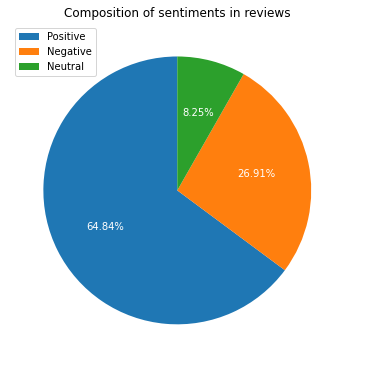

In [28]:
plt.figure(figsize=(6,8))
plt.pie(df['Sentiment'].value_counts(), labels= ['Positive', 'Negative','Neutral'],startangle=90, autopct='%1.2f%%', textprops= {"color": "white"})
plt.legend(loc='best')
plt.title("Composition of sentiments in reviews")

In [29]:
# entries of ratings
df.Rate.value_counts()


5                                                               80136
1                                                               32987
4                                                               27804
3                                                               19783
2                                                               10668
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)        1
Name: Rate, dtype: int64

The highest ratings were thoe rated 5 with 80,136, follwed by those rated 1 with 32987 while 2 had the lowest entries of 10,668.

we are going to remove the last entrie in rate which is  a string

In [30]:
# 
df[df['Rate'] == "Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)"]


,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
17299,"Pigeon Favourite Electric Kettle??????(1.5 L, ...",pigeon favourite electric kettle15 l silver black,"Pigeon Favourite Electric Kettle??????(1.5 L, ...","Pigeon Favourite Electric Kettle??????(1.5 L, ...",pigeon favourite electric kettle15 l silver black,Positive


In [31]:
#replacing it with the rate thathas lowest entries
df.replace('Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)', '2',inplace=True)

In [32]:
# dropping columns that arenot useful to our analysis
df.drop(columns=['Sentiment', 'ProductName'], axis=1, inplace=True)

In [33]:
# checking Rate column datatype
df.Rate.dtypes

dtype('O')

In [34]:
# conveting rate datatype into an int
df['Rate'] = df['Rate'].astype("float64")

wordcloud is a grapphical representation of most frequent and relevant words in a text. Below is a wordcloud that shows words in review. The bigger and frequent the word, the more vital it is

df.head()

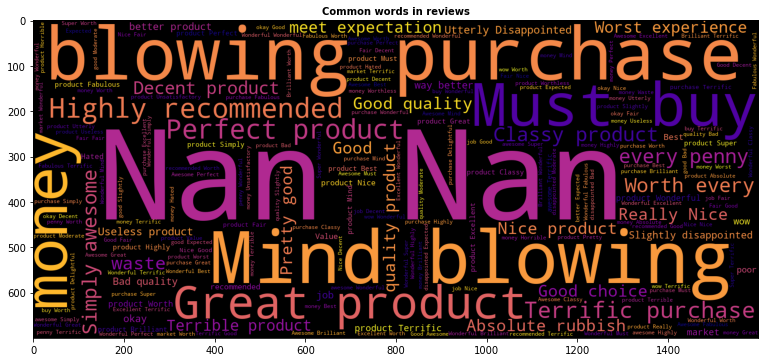

In [35]:
from wordcloud import WordCloud
plt.figure(figsize=(13,10))
wc = WordCloud(max_words=2000,min_font_size=10, height=700, width=1600, colormap='plasma', background_color='black').generate(
    " ".join(df['Review'])
)
plt.title("Common words in reviews", fontsize=10, weight=600)
plt.imshow(wc)

In [37]:
# this is a function that will show frequent words in review
def frequent_words(text):
    word = pd.DataFrame(wc.process_text("".join(text)).items()).sort_values(1, ascending=False)
    print(f'top 6 frequent words in the text')

    for i in range(6):
        item = word.iloc[i]
        print(item[0] + "---> " + str(item[1]))

In [38]:
#applying our function
frequent_words(df['Review'])

top 6 frequent words in the text
market---> 1517
money---> 1287
waste---> 968
Mind blowing---> 881
Must buy---> 879
Perfect product---> 856


Among top 6 frequent words in review:

market is the most common word with 1517 entries, followed by money with 1287 entries while the lowest is perfect product with 856 entries

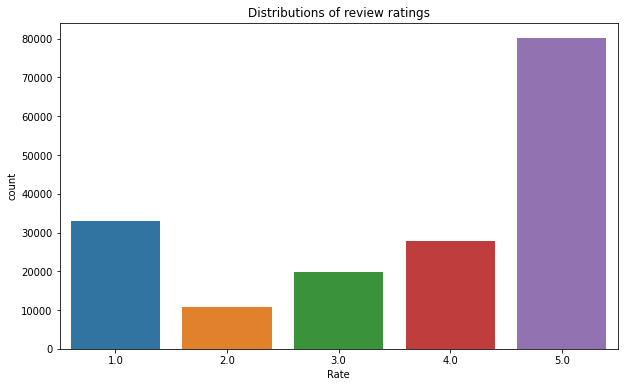

In [ ]:
# visualisation of entiries in rate column
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Rate'])
plt.title("Distributions of review ratings")
plt.show()

reviews rated 5 has the highest bar, followed by reviews rated 1 while reviews rated 2 have the smallest bar.

In [ ]:
#stripping our dataset to two column that are useful to our analysis
df = df.loc[:, ['Summary', 'Rate']]
df.head()

,Summary,Rate
0,great cooler excellent air flow and for this p...,5.0
1,best budget 2 fit cooler nice cooling,5.0
2,the quality is good but the power of air is de...,3.0
3,very bad product its a only a fan,1.0
4,ok ok product,3.0


In [ ]:
df.dtypes

Summary     object
Rate       float64
dtype: object

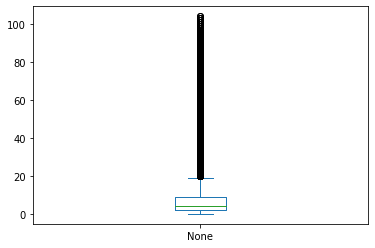

In [ ]:
# taking the length of each word in review
review_len = pd.Series(len(review.split()) for review in df['Summary'])
#plotting a box plot of words length
review_len.plot(kind='box')
plt.show('Distribution of outliers in the length of the texts')
plt.show()

Below are histograms of distributions of various ratings

count        32987
unique       19964
top       not good
freq           586
Name: Summary, dtype: object

Text(0.5, 1.0, 'Ditsibution of reviews rated 1')

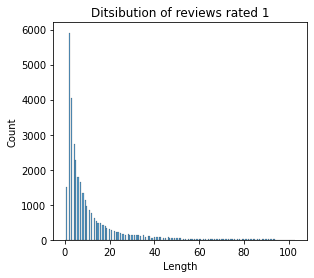

In [ ]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Summary.str.split().apply(len)
sns.histplot(df[df['Rate']==1]['Length'], ax=axes)
display(df.Summary[df['Rate']==1].describe())
plt.title("Ditsibution of reviews rated 1")

count        10669
unique        6840
top       not good
freq           288
Name: Summary, dtype: object

Text(0.5, 1.0, 'Ditsibution of reviews rated 2')

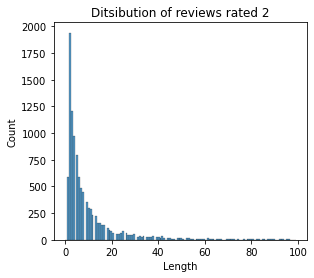

In [ ]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Summary.str.split().apply(len)
sns.histplot(df[df['Rate']==2]['Length'], ax=axes)
display(df.Summary[df['Rate']==2].describe())
plt.title("Ditsibution of reviews rated 2")

count     19783
unique    11240
top        good
freq       1207
Name: Summary, dtype: object

Text(0.5, 1.0, 'Ditsibution of reviews rated 3')

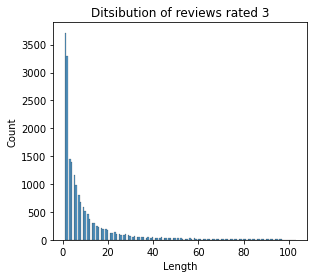

In [ ]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Summary.str.split().apply(len)
sns.histplot(df[df['Rate']==3]['Length'], ax=axes)
display(df.Summary[df['Rate']==3].describe())
plt.title("Ditsibution of reviews rated 3")

count     80136
unique    37245
top        good
freq       6088
Name: Summary, dtype: object

Text(0.5, 1.0, 'Ditsibution of reviews rated 5')

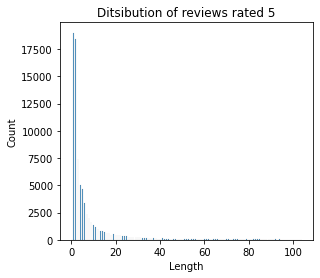

In [ ]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Summary.str.split().apply(len)
sns.histplot(df[df['Rate']==5]['Length'], ax=axes)
display(df.Summary[df['Rate']==5].describe())
plt.title("Ditsibution of reviews rated 5")

all those histograms shows that data is skewed to the left.They can be normalised by applying log-transformation.

Visualiation of various wordclouds of the ratings in our dataset

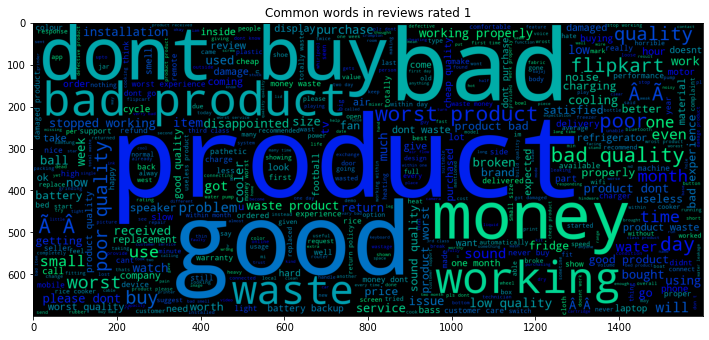

In [ ]:
plt.figure(figsize=(12, 12))
wc =WordCloud(max_words=2000,min_font_size=10, height=700,width=1600, colormap='winter_r', background_color='black').generate(
    " ".join(df[df['Rate']==1].Summary)
)
plt.title("Common words in reviews rated 1")
plt.imshow(wc)

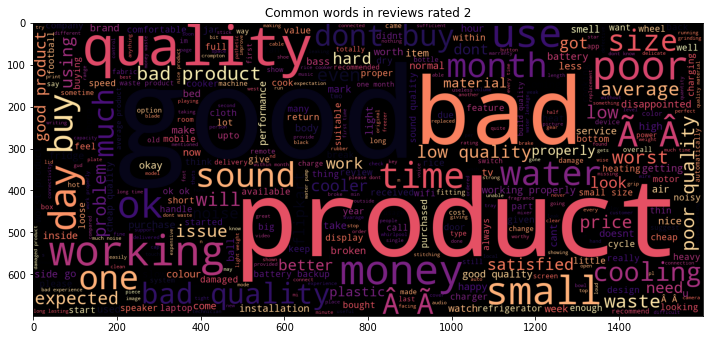

In [ ]:
plt.figure(figsize=(12, 12))
wc =WordCloud(max_words=2000,min_font_size=10, height=700,width=1600, colormap='magma', background_color='black').generate(
    " ".join(df[df['Rate']==2].Summary)
)
plt.title("Common words in reviews rated 2")
plt.imshow(wc)

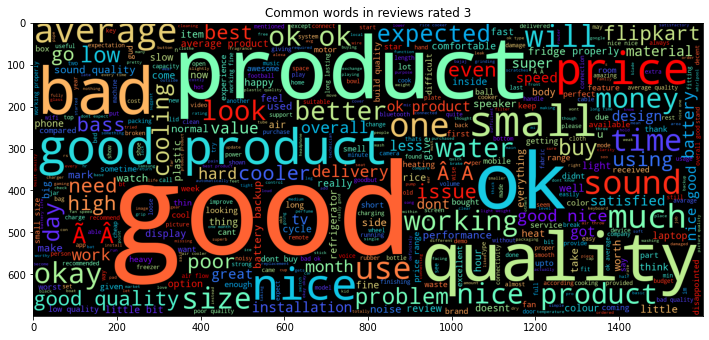

In [ ]:
plt.figure(figsize=(12, 12))
wc =WordCloud(max_words=2000,min_font_size=10, height=700,width=1600, colormap='rainbow_r', background_color='black').generate(
    " ".join(df[df['Rate']==3].Summary)
)
plt.title("Common words in reviews rated 3")
plt.imshow(wc)

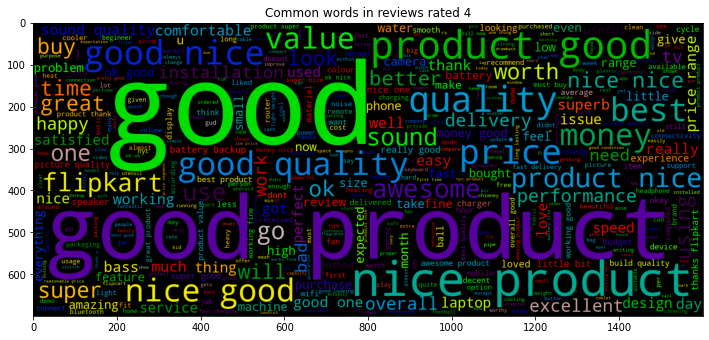

In [ ]:
plt.figure(figsize=(12, 12))
wc =WordCloud(max_words=3000,min_font_size=10, height=700,width=1600, colormap='nipy_spectral', background_color='black').generate(
    " ".join(df[df['Rate']==4].Summary)
)
plt.title("Common words in reviews rated 4")
plt.imshow(wc)

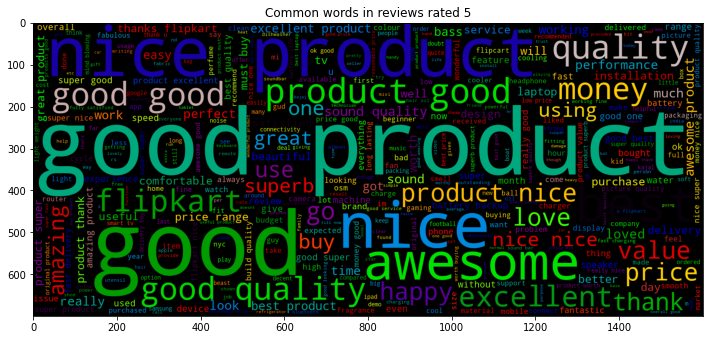

In [ ]:
plt.figure(figsize=(12, 12))
wc =WordCloud(max_words=3000,min_font_size=10, height=700,width=1600, colormap='nipy_spectral_r', background_color='black').generate(
    " ".join(df[df['Rate']==5].Summary)
)
plt.title("Common words in reviews rated 5")
plt.imshow(wc)

In [ ]:
df.head()

,Summary,Rate,Length
0,great cooler excellent air flow and for this p...,5.0,16
1,best budget 2 fit cooler nice cooling,5.0,7
2,the quality is good but the power of air is de...,3.0,11
3,very bad product its a only a fan,1.0,8
4,ok ok product,3.0,3


in order to classify various reviews  we need to categorize ratings into 3 distinct columns that is Positive, Fair and Negative.

In [ ]:
# a function that categorizes ratings
def review(rating):
    if rating > 3:
        return "Positive"
    elif rating == 3:
        return 'Fair'
    else:
        return 'Negative'
# applying the categories to ratings column
df['Rating'] = df['Rate'].apply(review)

In [ ]:
# 
df = df.loc[:, ['Summary', 'Rating']]
df.head()

,Summary,Rating
0,great cooler excellent air flow and for this p...,Positive
1,best budget 2 fit cooler nice cooling,Positive
2,the quality is good but the power of air is de...,Fair
3,very bad product its a only a fan,Negative
4,ok ok product,Fair


Text cleaning

Text cleaning involves removing punctuation marks and changing text from proper case into lowercase, removing repetitive and unuseful words like articles, prepositions, iterjections etc, modyfing words from various formats into their basic form in our text.

In [ ]:

# import prerequisite libraries for data cleaning
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# a function of cleaning data
def cleaning (text):
    # removing punctuation marks and changing the case of the text into lower case
    clean_text = text.translate(str.maketrans(" ", " ", string.punctuation)).lower()
    # removing stopwords
    clean_text = [w for w in clean_text.split() if w not in set(stopwords.words("english"))]
    #creating an empty list 
    sentence = []
    #applying wordnetlemmatizer to modify words into their basic form
    for w in clean_text:
        lemmatizer = WordNetLemmatizer()
        # adding the cleaned text into an empty list
        sentence.append(lemmatizer.lemmatize(w, 'v'))
        # combining the words that were split into a list
    return " ".join(sentence)


In [ ]:
#applying our cleaning function to summary column
df['Summary'].apply(cleaning)

0         great cooler excellent air flow price amaze un...
1                        best budget 2 fit cooler nice cool
2                             quality good power air decent
3                                           bad product fan
4                                             ok ok product
                                ...                        
171374    awesome productby every video makers dont word...
171375                       awesome product clear sound go
171376                                                 good
171377                                      lot echo record
171378    good expect ya work show doesnt us muc speak u...
Name: Summary, Length: 171379, dtype: object

In [ ]:
#splitting our data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df['Summary'], df['Rating'], test_size=0.2)

In [ ]:
import tensorflow as tf 
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#splitting paragraphs and long words into units that can be assigned meaning easily
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
#creating a word vocabulary index based on word frequency
tokenizer.fit_on_texts(x_train)
total_word = len(tokenizer.word_index)
#converting words into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_seq)
test_seq = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_seq)
# encoding categorical data from our corpus into numpy array
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)


LSTM Model

This is an advanced type of reinforcement neural network(RNN) that is capable of storing information as it passes various gradient problems that may result information being lost in RNN thus making it possible to classify, process and predict data.

In [ ]:

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_word, 8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 8)           317112    
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               3200      
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                      

In [ ]:
#fitiing and compiling our model
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(train_padded, train_labels, epochs=6, validation_data= (test_padded, test_labels))

Epoch 1/6
4285/4285 [==============================] - 692s 159ms/step - loss: 0.4676 - accuracy: 0.8396 - val_loss: 0.4073 - val_accuracy: 0.8507
Epoch 2/6
4285/4285 [==============================] - 679s 158ms/step - loss: 0.4228 - accuracy: 0.8523 - val_loss: 0.4073 - val_accuracy: 0.8567
Epoch 3/6
4285/4285 [==============================] - 690s 161ms/step - loss: 0.4112 - accuracy: 0.8558 - val_loss: 0.3876 - val_accuracy: 0.8570
Epoch 4/6
4285/4285 [==============================] - 663s 155ms/step - loss: 0.4038 - accuracy: 0.8579 - val_loss: 0.3996 - val_accuracy: 0.8570
Epoch 5/6
4285/4285 [==============================] - 687s 160ms/step - loss: 0.3978 - accuracy: 0.8596 - val_loss: 0.3934 - val_accuracy: 0.8556
Epoch 6/6
4285/4285 [==============================] - 678s 158ms/step - loss: 0.3931 - accuracy: 0.8614 - val_loss: 0.3864 - val_accuracy: 0.8635


Below is a plot of the performance of our model

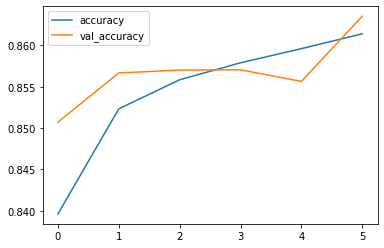

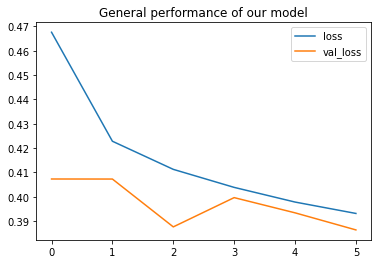

In [ ]:
model_history = pd.DataFrame(model_lstm.history.history)
model_history[['accuracy', 'val_accuracy']].plot()
model_history[['loss', 'val_loss']].plot()
plt.title("General performance of our model")
plt.show()

plots above shows the model is perfroming better.The sharp edges are as a result of using few epochs/iterations otherwise it would have been a smooth curve.

Making predictions

In [ ]:
#a function ued to make sentiment predicion of a text
def make_predictions(text):
    #applying cleaning function to cleanse the text
    pred = cleaning(text)
    #converting words in the text into sequences
    pred_seq = tokenizer.texts_to_sequences([pred])
    pred_padded = pad_sequences(pred_seq)
    # predicting the text in our model
    predict = model_lstm.predict(pred_padded)
    # converting numpy arrays into categorical words i.e positive, negative and fair
    predictions = lb.inverse_transform(predict)
    return predictions
    

let us use our model to predict a positive statement and see how it performs

In [ ]:
#predicting a positive text
text = 'great color and excellent airflow from the fan'
make_predictions(text)

1/1 [==============================] - 2s 2s/step


array(['Positive'], dtype='<U8')

it predicts well, let use a negative text

In [ ]:
# predicting a negative text
text = 'its poor quality, buying it was the worst decision i have ever made'
make_predictions(text)

1/1 [==============================] - 0s 92ms/step


array(['Negative'], dtype='<U8')

wow! it works as expected.It seems our model performed well

In [ ]:
text = 'ok ok product'
make_predictions(text)

1/1 [==============================] - 0s 59ms/step


array(['Negative'], dtype='<U8')